In [1]:
import os
print(os.getcwd())

C:\Users\pc-mansarda\Documents\GitHub\DWM-Project\Progetto


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sb

from sklearn import neighbors
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score, r2_score

from sklearn.decomposition import PCA

In [3]:
import pandas as pd 
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")


In [4]:
print("data.shape:", data.shape)
print("data.index:", data.index)
print("data.columns:", data.columns)
print("data_test.columns:", data_test.columns)

data.shape: (3000, 23)
data.index: RangeIndex(start=0, stop=3000, step=1)
data.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
data_test.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')


In [5]:
data.drop(['homepage'],axis=1,inplace=True)

In [6]:
def convertAll(data):
    import math
    import datetime

    data["release_date"] = pd.to_datetime(data["release_date"])
    #fix della data in quanto ci sono date che superano il 2021
    i=0
    maxDate = datetime.datetime(2020, 1, 1)
    n_elem = data.shape[0]
    while i<n_elem:
        if data['release_date'][i]>maxDate:
            new_year=(data['release_date'][i].year)-100
            new_date = datetime.datetime(new_year, data['release_date'][i].month, data['release_date'][i].day, 0, 0, 0)
            data['release_date'][i] = new_date
        i+=1
    i=0
    n_elem = data.shape[0]
    while i<n_elem:
        if isinstance(data["genres"][i], float):
            if math.isnan(data["genres"][i]):
                i+=1
                continue
        data["genres"][i]=eval(data["genres"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["production_countries"][i], float):
            if math.isnan(data["production_countries"][i]):
                i+=1
                continue
        data["production_countries"][i]=eval(data["production_countries"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["spoken_languages"][i], float):
            if math.isnan(data["spoken_languages"][i]):
                i+=1
                continue
        data["spoken_languages"][i]=eval(data["spoken_languages"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["Keywords"][i], float):
            if math.isnan(data["Keywords"][i]):
                i+=1
                continue
        data["Keywords"][i]=eval(data["Keywords"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["cast"][i], float):
            if math.isnan(data["cast"][i]):
                i+=1
                continue
        data["cast"][i]=eval(data["cast"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["crew"][i], float):
            if math.isnan(data["crew"][i]):
                i+=1
                continue
        data["crew"][i]=eval(data["crew"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["production_companies"][i], float):
            if math.isnan(data["production_companies"][i]):
                i+=1
                continue
        data["production_companies"][i]=eval(data["production_companies"][i])
        i+=1


In [7]:
convertAll(data)
convertAll(data_test)

<ipython-input-6-b2a67e616a86>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_date'][i] = new_date
<ipython-input-6-b2a67e616a86>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genres"][i]=eval(data["genres"][i])
<ipython-input-6-b2a67e616a86>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["production_countries"][i]=eval(data["production_countries"][i])
<ipython-input-6-b2a67e616a86>:41: SettingWithCop

In [8]:
data["release_month"]=data["release_date"].dt.month

In [9]:
data["lingua_inglese"] = 0

i=0
n_elem = data.shape[0]
while i<n_elem:
    if data["original_language"][i]=="en":
        data["lingua_inglese"][i]=1
    else:
        data["lingua_inglese"][i]=0
    i+=1

data["lingua_inglese"]

data_test["lingua_inglese"] = 0
i=0
n_elem = data_test.shape[0]
while i<n_elem:
    if data_test["original_language"][i]=="en":
        data_test["lingua_inglese"][i]=1
    else:
        data_test["lingua_inglese"][i]=0
    i+=1

<ipython-input-9-0ddffbac9336>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lingua_inglese"][i]=1
<ipython-input-9-0ddffbac9336>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lingua_inglese"][i]=0
<ipython-input-9-0ddffbac9336>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["lingua_inglese"][i]=0
<ipython-input-9-0ddffbac9336>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [10]:
# sostituzione dei valori NaN nella colonna runtime con il valore 0

import math

i=0
n_elem = data.shape[0]
media = data["runtime"].describe()['mean']
while i<n_elem:
    if math.isnan(data["runtime"][i]):
        data["runtime"][i] = media
        print(data["id"][i])
    i+=1


1336
2303


<ipython-input-10-e228b683a274>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["runtime"][i] = media


In [11]:
most_famous_director = ["Francis Ford Coppola", "Steven Spielberg", "Irvin Kershner", "Frank Darabont", "Martin Scorsese", "Stanley Donen", "Gene Kelly", "Quentin Tarantino", "David Fincher", "Billy Wilder", "Roman Polanski", "Sergio Leone", "Christopher Nolan", "Stanley Kubrick", "Michael Curtiz", "Ridley Scott", "Carol Reed", "George Lucas", "Robert Zemeckis", "Peter Jackson", "Sergio Leone", "Stanley Kubrick", "Billy Wilder", "Orson Welles", "John McTiernan", "James Cameron", "Victor Fleming", "Sam Wood", "George Cukor", "George Roy Hill", "Ridley Scott", "Andrej Tarkovskij", "Stanley Kubrick", "Michael Mann", "Larry Wachowski", "Alfred Hitchcock", "François Truffaut", "Robert Hamer", "Ethan Coen", "Elia Kazan", "Rob Reiner", "Sam Raimi", "Akira Kurosawa"]

data["famous_director"] = 0
index_row = 0
index_list = 0
while index_row < len(data["crew"]):
    if data["crew"][index_row]==data["crew"][index_row]:
        while index_list < len(data["crew"][index_row]):
            if data["crew"][index_row][index_list]["job"] == 'Director':
                if data["crew"][index_row][index_list]["name"] in most_famous_director:
                    data["famous_director"][index_row] = 1
            index_list+=1
    index_list = 0
    index_row+=1


<ipython-input-11-9312ca926f30>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["famous_director"][index_row] = 1


## Normalizzazione con log di revenue, budget e popularity

In [12]:
data['budgetLOG']= np.log(data["budget"])
data['popularityLOG']=np.log(data["popularity"])
data['revenueLOG']=np.log(data["revenue"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
data["release_date"] = pd.to_datetime(data["release_date"])
#fix della data in quanto ci sono date che superano il 2021
i=0
n_elem = data.shape[0]
while i<n_elem:
    if data['budgetLOG'][i]<=np.finfo(np.float64).min:
        data['budgetLOG'][i]=0
    if data['popularityLOG'][i]<=np.finfo(np.float64).min:
        data['popularityLOG'][i]=0 
    if data['revenueLOG'][i]<=np.finfo(np.float64).min:
        data['revenueLOG'][i]=0    
    i+=1


<ipython-input-13-69df0d9550c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['budgetLOG'][i]=0


In [14]:
min(data['popularity'])

1e-06

In [15]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     0
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
release_month               0
lingua_inglese              0
famous_director             0
budgetLOG                   0
popularityLOG               0
revenueLOG                  0
dtype: int64

# Tuning

In [16]:
# mi fa il tuning dei parametri per l'algoritmo
def tuning_knn(max_neighbors, function_of_MinKowski = 2, custom_fun = None, font_size = 1):
    sb.set(font_scale = font_size)
    df_knn = pd.DataFrame(columns = ["Neighbors", "R^2", "SSR", "Bias^2", "Variance"]) #creo il df per inserire i valori per ogni ciclo di for
    for i in range(1, max_neighbors + 1):
        if custom_fun == None: 
            knn = KNeighborsRegressor(n_neighbors = i, p = function_of_MinKowski)
        else:
            knn = KNeighborsRegressor(n_neighbors = i, metric = custom_fun)
        knn.fit(x_train, y_train) #train
        y_predict = knn.predict(x_validate) #predict
        # inserisco nel df i dati della predizione
        df_knn = df_knn.append({"Neighbors" : i, "R^2" : knn.score(x_validate, y_validate), "SSR" : sum((y_predict - y_validate)**2), 
                                "Bias^2" : np.mean((np.mean(y_predict) - y_validate)**2), "Variance" : np.var(y_predict)}, ignore_index = True)
    #grafici riguardanti il tuning dei parametri    
    fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
    for i, ax in enumerate(axs[0,]): #prima riga
        sb.lineplot(ax = ax, data = df_knn, x = "Neighbors", y = df_knn.columns[i + 1])
    for i, ax in enumerate(axs[1,]): #seconda riga
        sb.lineplot(ax = ax, data = df_knn, x = "Neighbors", y = df_knn.columns[i + 3])
    return df_knn

def tuning_rf(n, max_deep, criterion = "mse"):
    df_dt = pd.DataFrame(columns = ["N modelli", "Deep", "R^2", "SSR", "Bias^2", "Variance"]) # creo il df per tenere traccia del tuning
    for model in range(2, n + 1):
        for deep in range(1, max_deep + 1):
            rf = RandomForestRegressor(n_estimators = model, max_depth= deep, criterion = criterion)
            rf.fit(x_train, y_train)
            y_predict = rf.predict(x_validate)
            df_dt = df_dt.append({"N modelli" : model, "Deep" : deep,"R^2" : rf.score(x_validate, y_validate), "SSR" : sum((y_predict - y_validate)**2), 
                                  "Bias^2" : np.mean((np.mean(y_predict) - y_validate)**2), "Variance" : np.var(y_predict)}, ignore_index = True)
    #plotto i grafici riguardanti il tuning
    fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize=(10,10))
    for i, ax in enumerate(axs[0,]):#prima riga
        sb.lineplot(ax = ax, data = df_dt, x = "N modelli", y = df_dt.columns[i + 2])
    for i, ax in enumerate(axs[1,]):#seconda riga
        sb.lineplot(ax = ax, data = df_dt, x = "Deep", y = df_dt.columns[i + 2])
        #modifica la posizione dei sotto grafici
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=1.05, hspace=0.25,
                    wspace=0.5)    
    return df_dt

In [17]:
def get_words (data):
    import math
    descrizioni = []
    i=0
    while i<1000:
        if isinstance(data["overview"][i], float):
            if math.isnan(data["overview"][i]):
                empty_list=[]
                descrizioni += empty_list
                i+=1
                continue
        desc = data["overview"][i]         # this is a string
        words = desc.split() # this is a list
        words = set(words)     # create a set
        descrizioni += [words] # append words to the list
        i=i+1
    return descrizioni

In [18]:
lyrics_word_split = get_words(data)

print ( lyrics_word_split[3] )

{'what', 'herself', 'own', 'reach', 'of', 'for', 'from', 'relentless', 'slowly', 'seem', 'Balan)', 'life.', 'even', 'lies,', 'not', 'nothing', 'unborn', 'husband', 'London', 'missing', 'him,', 'end', 'everyone', 'cost', 'Bagchi.', 'seems.', '-', 'begins', 'truth', 'pregnant', 'realises', 'except', 'Vidya', 'Seven', 'she', 'on', 'determined', 'Kolkata', 'child', 'exist.', 'the', 'is', 'and', 'convince', '(Vidya', 'alone', 'does', 'arrives', 'months', 'when', 'rely', 'all', 'clues', 'city', 'tries', 'Bagchi', 'about', 'festive', 'unravel', 'at', 'memories', 'find', 'city,', 'her', 'a', 'dead', 'to', 'in', 'With', 'husband.', 'soaked', 'fragments', 'She', 'Arnab', 'it', 'In', 'search', 'that'}


# Jaccar

In [19]:
def jaccard(a,b):
    return len(a & b) / len( a | b)

In [20]:
jaccard(lyrics_word_split[0],lyrics_word_split[123])

0.06896551724137931

In [21]:
def most_similar_jaccard(film_ricerca, lyrics_word_split):
    most_similar_id=1
    jaccard_most_similar=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[2])
    list_size=len(lyrics_word_split)
    current_id=2
    while current_id<list_size:
        current_sim=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[current_id])
        if current_sim>jaccard_most_similar:
            jaccard_most_similar=current_sim
            most_similar_id=current_id
        current_id=current_id+1
    
    return most_similar_id, jaccard_most_similar

sim_id, sim_value = most_similar_jaccard(0, lyrics_word_split)

In [22]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     0
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
release_month               0
lingua_inglese              0
famous_director             0
budgetLOG                   0
popularityLOG               0
revenueLOG                  0
dtype: int64

data_with_budget.shape: (2188, 28)


Text(0.5, 1.0, 'Revenue based on budget per movie')

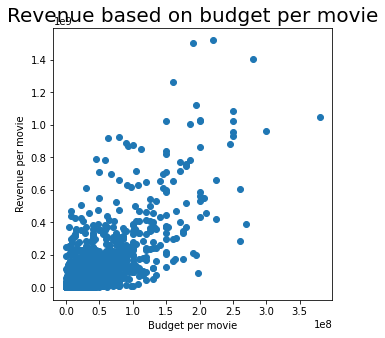

In [23]:
import matplotlib.pyplot as plt
#data_with_budget: array tolti gli elementi con budget = 0
data_with_budget = data[data["budget"] != 0]
print("data_with_budget.shape:", data_with_budget.shape)

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data_with_budget.iloc[:, 2], data_with_budget.iloc[:, 21])

ax.set_xlabel("Budget per movie", fontsize=10)
ax.set_ylabel("Revenue per movie", fontsize=10)
ax.set_title('Revenue based on budget per movie', fontsize=20)

In [24]:
import numpy as np

#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans

#matrix budget-revenue
#matrice = [len(data_with_budget)][2]
#br = [data_with_budget['budget'], data_with_budget['revenue']]

#k_means = KMeans(n_clusters=5, n_init=1)
#k_means.fit(br)


#fig, ax = plt.subplots(figsize=(5,5))

#ax.scatter(br.iloc[0, :], br.iloc[1, :], c=k_means.labels_)

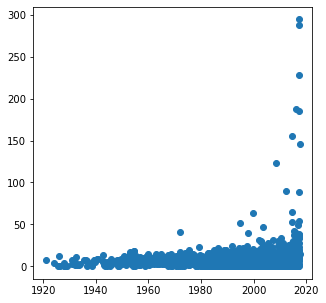

In [25]:
from datetime import datetime
import matplotlib.pyplot as plt

data = data.sort_values(by="release_date")
data["release_date"] = pd.to_datetime(data["release_date"])

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data['release_date'], data['popularity'])


In [26]:
#aggiunta la colonna anno di uscita
#per evitare errori usare il .dt per estrarre info dalle date
data["release_year"]=data["release_date"].dt.year


In [27]:
# Si vuole sviluppare un algoritmo che, in base al genere del film che uscirà, preveda, grazie ai "vicini", quanto potrebbe
# guadagnare al botteghino
# utilizzo dell'algoritmo knn

#out: lista di tutti i generi presenti nel DB
out = []
for lista_generi_per_film in data['genres']:
    if not isinstance(lista_generi_per_film, float):
        for genere in lista_generi_per_film:
            if genere['name'] not in out:
                out.append(genere['name'])
            
print(out)

['Comedy', 'Drama', 'Action', 'Adventure', 'Family', 'Fantasy', 'Romance', 'History', 'Mystery', 'Horror', 'Thriller', 'Crime', 'War', 'Music', 'Western', 'Science Fiction', 'Animation', 'Documentary', 'Foreign', 'TV Movie']


(1960.0, 2021.8)

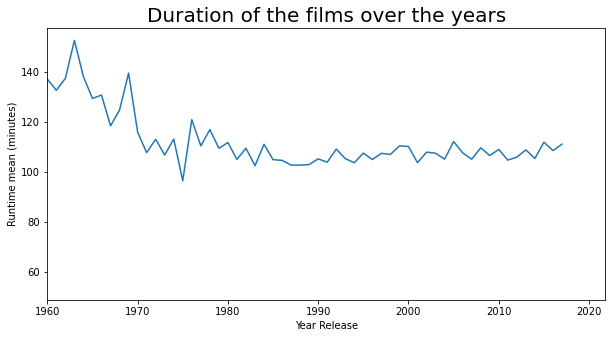

In [28]:
grupByMovies=data['runtime'].groupby(data["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Runtime mean (minutes)", fontsize=10)
x.set_title('Duration of the films over the years', fontsize=20)

#We made the x axis starting from 1960 in previous year there were way few film in order to have a decent graph
x.set_xlim(1960)

In [29]:
#Proviamo a usare l'algoritmo knn applicato su popularity, budget, runtime per predirre la revenue. 
#Visto che i valori hanno un range molto diverso bisogna prima normalizzarli portandoli in un range 0-1
#Usiamo la formula (x-min(x))/(max(x)-min(x))

In [30]:
#creo un funzione che aggiunge una colonna al database con il campo normalizzato

def normalizza(data, campo):
    #data[campo+"Norm"]=(data[campo]-data[campo].min())/(max(data[campo])-min(data[campo]))
    data[campo+"Norm"]=data[campo]
    
normalizza(data,"popularity")
normalizza(data,"budget")
normalizza(data,"runtime")

#DA FIXARE: fillare valori nan con media al posto dello 0
data.runtimeNorm=data.runtimeNorm.fillna(0)

data.isna().sum()
          

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     0
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
release_month               0
lingua_inglese              0
famous_director             0
budgetLOG                   0
popularityLOG               0
revenueLOG                  0
release_year                0
popularityNorm              0
budgetNorm                  0
runtimeNorm                 0
dtype: int64

In [31]:
data["runtimeNorm"].fillna(0)
data[ ["revenue","popularityNorm", "runtimeNorm", "budgetNorm"]].info()
dataset = data[ ["revenue","popularityNorm", "runtimeNorm", "budgetNorm"]].astype(float).values


X = dataset[:,1:]
print("X shape", X.shape)

# get class label
y = dataset[:,0]
print("y shape", y.shape)
print (y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1763 to 2623
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   revenue         3000 non-null   int64  
 1   popularityNorm  3000 non-null   float64
 2   runtimeNorm     3000 non-null   float64
 3   budgetNorm      3000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 197.2 KB
X shape (3000, 3)
y shape (3000,)
[2.50000000e+06 1.21388000e+06 1.00000000e+00 ... 4.22000000e+02
 3.69907963e+08 9.00242920e+07]


# KNN

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


trasf=StandardScaler()

features = ["budgetLOG","runtime","popularityLOG", "release_month", "lingua_inglese", "revenueLOG"]
dataPred=data[features]
dataPred=pd.DataFrame(columns = dataPred.columns, data = trasf.fit_transform(dataPred))

X=dataPred.iloc[:,0:5]
y=dataPred.iloc[:,5]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
scaler.fit(x_train)

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [33]:
import seaborn as sb


# mi fa il tuning dei parametri per l'algoritmo
def tuning_knn(max_neighbors, function_of_MinKowski = 2, custom_fun = None, font_size = 1):
    sb.set(font_scale = font_size)
    df_knn = pd.DataFrame(columns = ["Neighbors", "R^2", "SSR", "Bias^2", "Variance"]) #creo il df per inserire i valori per ogni ciclo di for
    for i in range(1, max_neighbors + 1):
        if custom_fun == None: 
            knn = KNeighborsRegressor(n_neighbors = i, p = function_of_MinKowski)
        else:
            knn = KNeighborsRegressor(n_neighbors = i, metric = custom_fun)
        knn.fit(x_train, y_train) #train
        #kNN.fit(scaler.transform(X_train),y_train)
        y_predict = knn.predict(x_validate) #predict
        # inserisco nel df i dati della predizione
        df_knn = df_knn.append({"Neighbors" : i, "R^2" : knn.score(x_validate, y_validate), "SSR" : sum((y_predict - y_validate)**2), 
                                "Bias^2" : np.mean((np.mean(y_predict) - y_validate)**2), "Variance" : np.var(y_predict)}, ignore_index = True)
          #grafici riguardanti il tuning dei parametri    
    fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
    for i, ax in enumerate(axs[0,]): #prima riga
        sb.lineplot(ax = ax, data = df_knn, x = "Neighbors", y = df_knn.columns[i + 1])
    for i, ax in enumerate(axs[1,]): #seconda riga
        sb.lineplot(ax = ax, data = df_knn, x = "Neighbors", y = df_knn.columns[i + 3])
    return df_knn


In [34]:
#dato il df trovo la miglior predizione e faccio un summary di grafici
def summary_knn_best(df_knn, function_of_MinKowski = 2, custom_fun = None):
    sb.set(font_scale = 1.5) #modifico la scala
    print(df_knn.iloc[df_knn["R^2"].idxmax()]) #print dei parametri per il miglior tuning dell'algoritmo
    if custom_fun == None: # istanzio l'algoritmo senza custom_fun
        knn = KNeighborsRegressor(n_neighbors = int(df_knn.iloc[df_knn["R^2"].idxmax()]["Neighbors"]),
                                  p = function_of_MinKowski)
    else: # istanzio l'algoritmo con custom_fun
        knn = KNeighborsRegressor(n_neighbors = int(df_knn.iloc[df_knn["R^2"].idxmax()]["Neighbors"]),
                                  metric = custom_fun)
    knn.fit(x_train, y_train) # train
    # creo un summary di grafici per la miglior predizione
    fig = plt.figure(constrained_layout = False, figsize=(20,20)) # creo la figura
    gs = fig.add_gridspec(4,4) # creo la griglia di grafici, 4 righe e 4 colonne
    ax0 = [fig.add_subplot(gs[0, 0:2]), fig.add_subplot(gs[0, 2:])] #creo asse per la prima riga
    ax1 = [fig.add_subplot(gs[1, 0:2]), fig.add_subplot(gs[1, 2:])] #creo asse per la seconda riga
    axbig = fig.add_subplot(gs[2:, 0:]) #creo asse per il super grafico
    for i, ax in enumerate(ax0): #prima riga di grafici
        sb.lineplot(ax = ax, data = df_knn, x = "Neighbors", y = df_knn.columns[i + 1]) #grafico
        ax.axvline(x = int(df_knn.iloc[df_knn["R^2"].idxmax()]["Neighbors"]), color = "red", #retta verticale per il n di vicini scelti
                   linestyle = ":", label = "Miglior previsione")
        ax.legend()
    for i, ax in enumerate(ax1): #seconda riga di grafici
        sb.lineplot(ax = ax, data = df_knn, x = "Neighbors", y = df_knn.columns[i + 3]) #grafico
        ax.axvline(x = int(df_knn.iloc[df_knn["R^2"].idxmax()]["Neighbors"]), color = "red", #retta verticale per il n di vicini scelti
                   linestyle = ":", label = "Miglior previsione")
        ax.legend()
    l_residual = abs(knn.predict(x_test) - y_test) #lista dei residui in valore assoluto
    for i, val in enumerate(l_residual): #super grafico
        axbig.scatter(i, val, color = "darkgreen") #punto i-esimo
        axbig.vlines(x = i, ymin = 0, ymax = val, color = "green") #linea i-esima
    axbig.set_title("Residui in valore assoluto") #titolo del super grafico
    axbig.set(xlabel="valori osservati", ylabel = "residui")
    # setta la posizione dei subplot
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=1.05, hspace=0.25,
                    wspace=0.5)
    sb.set(font_scale = 1) #riporto la scala all'originale

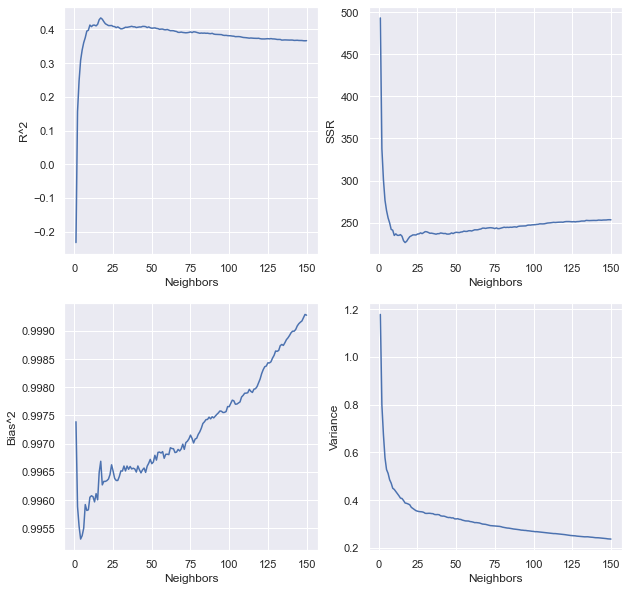

In [35]:
df_knn_md = tuning_knn(150,1)

Neighbors     17.000000
R^2            0.434171
SSR          226.396198
Bias^2         0.996689
Variance       0.387451
Name: 16, dtype: float64


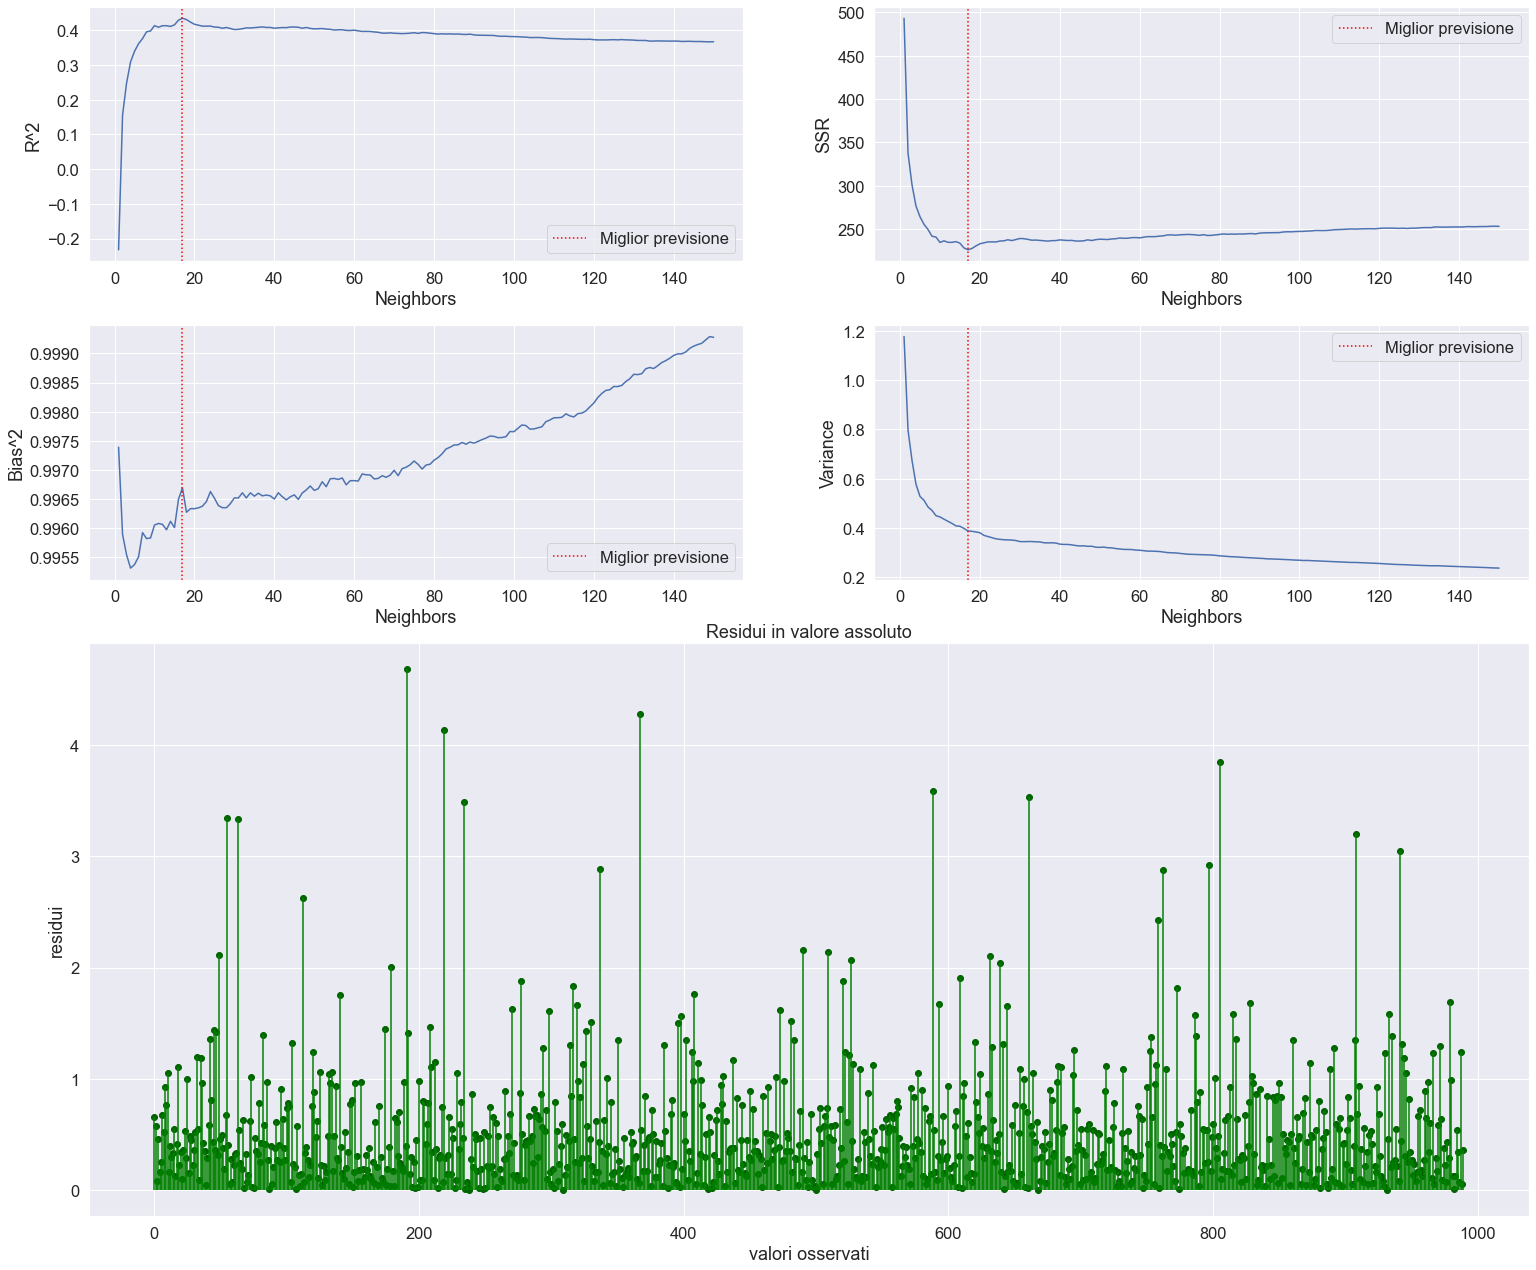

In [36]:
summary_knn_best(df_knn_md)

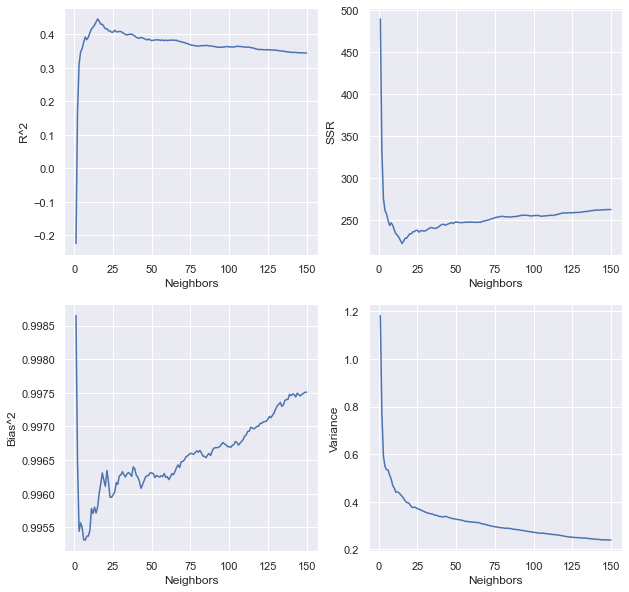

In [37]:
df_knn_ec = tuning_knn(150)

Neighbors     15.000000
R^2            0.446085
SSR          221.629277
Bias^2         0.995804
Variance       0.423095
Name: 14, dtype: float64


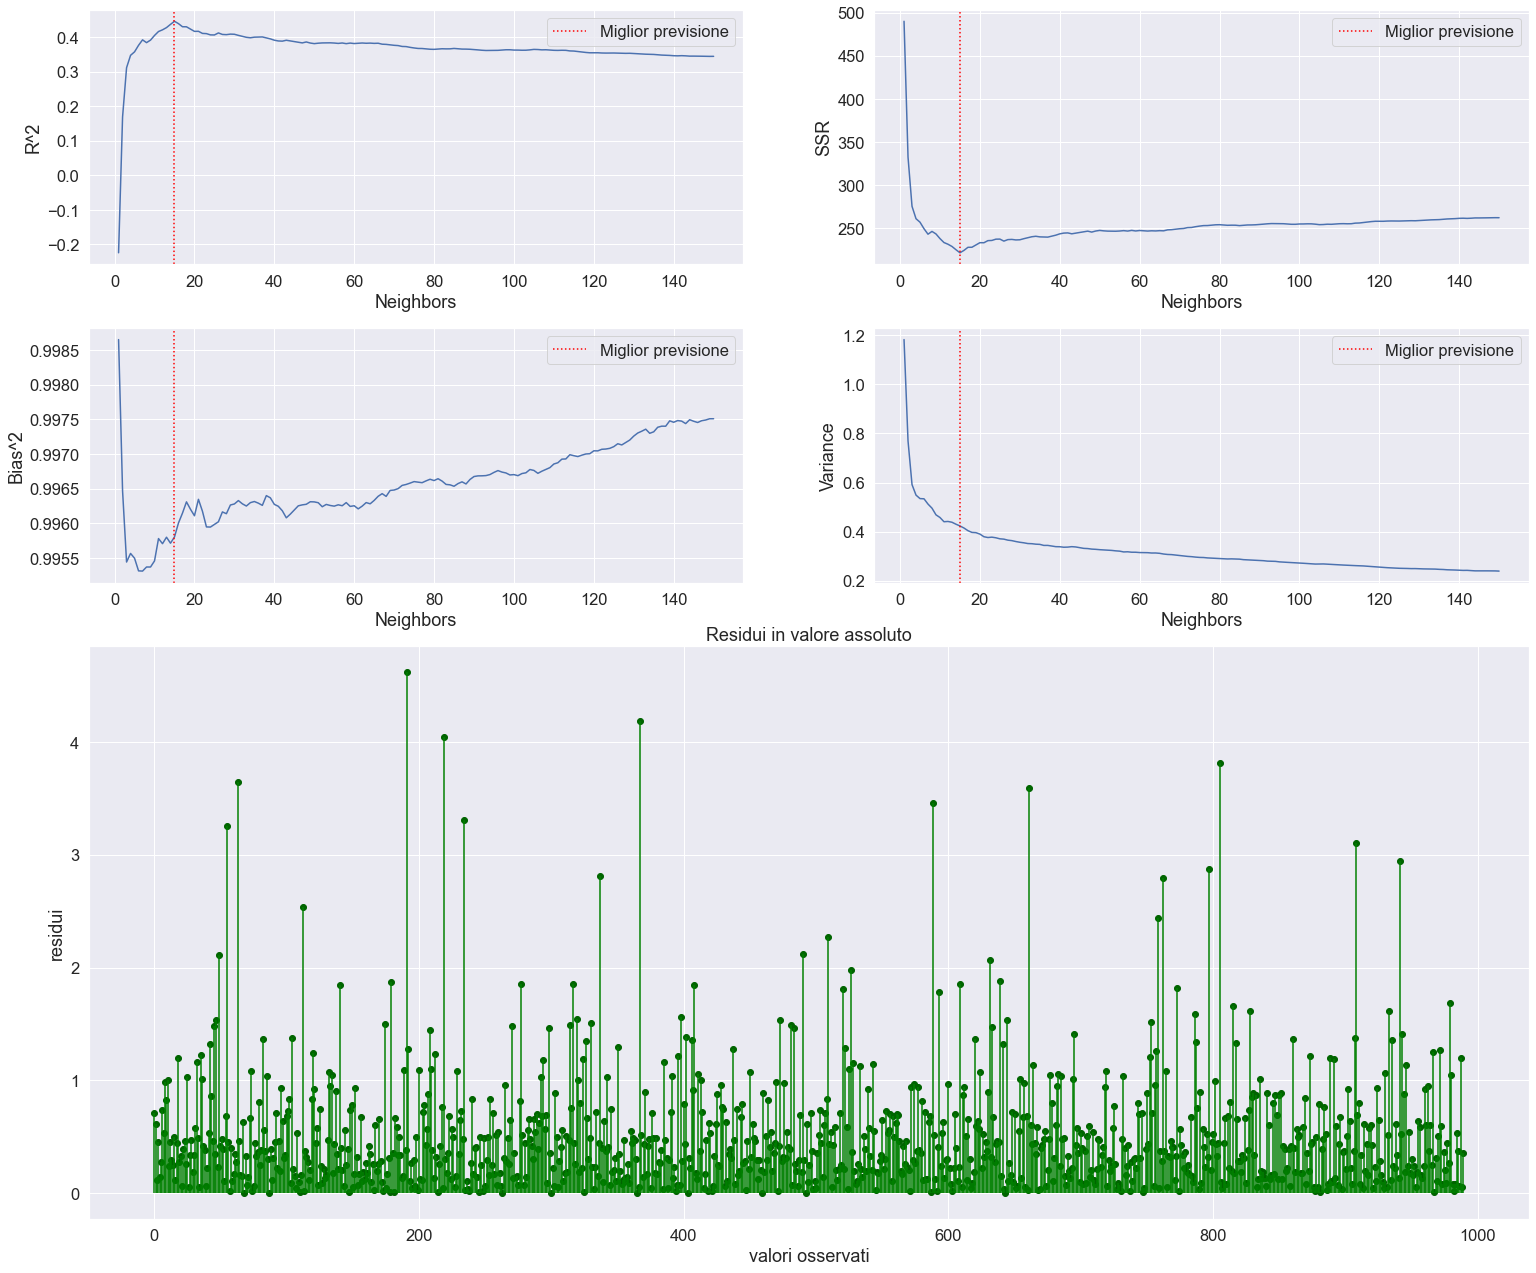

In [38]:
summary_knn_best(df_knn_ec)

# DA SPOSTARE IN ANALISI

In [39]:
i=0
n_elem = data_test.shape[0]
while i<n_elem:
    if pd.isnull(data_test["release_date"][i]):
        print(data_test["id"][i])
        print(i)
        print(data_test["title"][i])
        print(data_test["release_date"][i])
    i+=1

#solamente a un film mancava la data, dopo averlo cercato abbiamo riempito il campo release_date con il dato corretto
new_date = datetime(2001, 3, 20, 0, 0, 0)
data_test["release_date"][828]=new_date   

3829
828
Jails, Hospitals & Hip-Hop
NaT


<ipython-input-39-91f533a110f4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["release_date"][828]=new_date


# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

datasetTrainLinear = data[["revenue", "budget", "runtime", "popularity", "release_month", "lingua_inglese"]].astype(float).values
features = ["budget", "runtime", "popularity", "release_month", "lingua_inglese", "revenue"]



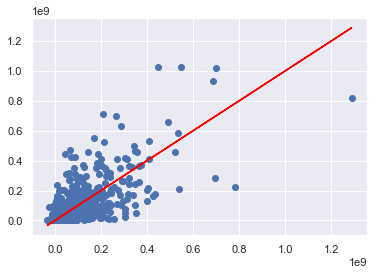

0.6469242824244295

In [41]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split


dataPred=data[features]
X=dataPred.iloc[:,0:5]
y=dataPred.iloc[:,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34)

lreg=LinearRegression()

lreg.fit(X_train, y_train)

y_pred=lreg.predict(X_test)

plt.scatter(y_pred, y_test)
plt.plot(y_pred, y_pred, color='red')
plt.show()

score=lreg.score(X_train, y_train)
score

Non avendo una curva da seguire, non ha senso provare con polinomi di grado maggiore al primo perchè perchè la roba dei polinomi funziona con le curve.

In [42]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error

for d in [2,4,8,16]:
    # prepare the data
    train_size = int(data.shape[0]*0.66) -1
    poly = PolynomialFeatures(d, include_bias=False)
    poly.fit(X_train)
    X_train_2 = poly.transform(X_train)

    # train the model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_2, y_train)

    y_pred = model.predict(poly.transform(X))

    print ("Polynomial degree:", d)
    print ("Train Error: {:.3f}".format( mean_squared_error(y_true = y_train, 
                                              y_pred = y_pred[:train_size])) )
    print ("Test Error : {:.3f}".format( mean_squared_error(y_true = y_test,  
                                              y_pred = y_pred[train_size:])) )
    print ()

Polynomial degree: 2
Train Error: 29245041664683036.000
Test Error : 38376263284499264.000

Polynomial degree: 4
Train Error: 29757041461042500.000
Test Error : 40037361798926952.000

Polynomial degree: 8
Train Error: 24324495750997652.000
Test Error : 32411700692762968.000

Polynomial degree: 16
Train Error: 21711538587045168.000
Test Error : 20887816612833616.000



# PCA

In [43]:
from sklearn.preprocessing import StandardScaler

dataPred=data[features]
X=dataPred.iloc[:,0:5]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
print(scaled_data)

[[-0.60187427 -1.80547541 -0.02436115 -1.69436819  0.40626167]
 [-0.57795055  1.86376919 -0.37884365 -1.10760788  0.40626167]
 [-0.6086114   1.3201774  -0.67563766  0.3592929   0.40626167]
 ...
 [-0.60862739 -0.40119661  2.39806186 -0.22746741  0.40626167]
 [ 3.49727076  1.45607535 11.37817803  0.06591274  0.40626167]
 [ 4.72557386  1.3201774   0.56184446  0.06591274  0.40626167]]


In [44]:
from sklearn.decomposition import PCA

features = ["budget", "runtime", "popularity", "release_month", "lingua_inglese", "revenue"]

pca = PCA() # this will create as many components 
            # as the number of features
pca.fit(scaled_data)  # note this matrix is [samples x dimentions]
pca.components_

array([[ 0.64464643,  0.40510627,  0.57000727,  0.12682664,  0.28164978],
       [-0.06883771,  0.59510503, -0.16023998,  0.50409645, -0.60110007],
       [ 0.06963347,  0.20024622,  0.21735315, -0.7910604 , -0.53106844],
       [-0.14978239, -0.51585498,  0.66794986,  0.31391115, -0.4083646 ],
       [-0.74324206,  0.41896778,  0.39498791, -0.07406085,  0.33250078]])

In [45]:
# project data onto the selected components
X_proj = pca.transform(scaled_data)

print ( X_proj.shape )
print ( X_proj[:10] )

(3000, 5)
[[-1.23375906 -2.12744113  0.71584962  0.30745767 -0.05815144]
 [ 0.14045652  0.40708399  0.91105716 -1.64150972  1.27789045]
 [-0.08265398  0.87271815 -0.42484629 -1.09426974  0.84706146]
 [-1.28459569  1.34951237 -0.16584871  2.59088061 -0.95796097]
 [-1.15134427 -1.00268705 -0.2056431  -0.12516576 -0.09774877]
 [-0.64789302 -0.19104943 -0.975807    0.22137693  0.13859507]
 [-1.04966143 -0.36791964 -1.40660514  0.41546435 -0.29052744]
 [-1.18758936 -1.11925965  0.02970461 -0.25676307 -0.06351523]
 [-2.47296339 -2.81872722 -1.10502512  1.66161562 -1.50334927]
 [-1.26727766 -0.63082217 -1.76589084  0.88751071 -0.57557169]]


In [46]:
# move data back to the original space
X_approx = pca.inverse_transform(X_proj)
X_approx.shape

(3000, 5)

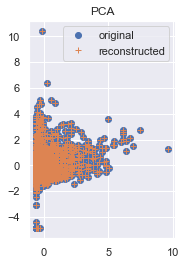

In [47]:
ig, ax = plt.subplots()

ax.plot( scaled_data[:,0], scaled_data[:,1], 'o', label="original" )

ax.plot( X_approx[:,0], X_approx[:,1], '+', label="reconstructed" )

ax.set_title("PCA")
ax.set_aspect('equal')
ax.legend()

In [48]:
len(data['popularity'].unique())

2999

In [49]:
max(data['popularity'])

294.337037

In [50]:
i = 0
count = 0
while i < data.shape[0]:
    if data['popularity'][i] >= 20:
        count += 1
    i+=1
    
print(count)

83


# Random Forest

In [51]:
num_var=['budget','popularity','runtime','lingua_inglese','revenue']
corr_table=data[num_var].corr()
corr_table['revenue'].sort_values(ascending=False)

revenue           1.000000
budget            0.752965
popularity        0.461460
runtime           0.216363
lingua_inglese    0.142130
Name: revenue, dtype: float64

In [52]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     0
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
release_month               0
lingua_inglese              0
famous_director             0
budgetLOG                   0
popularityLOG               0
revenueLOG                  0
release_year                0
popularityNorm              0
budgetNorm                  0
runtimeNorm                 0
dtype: int64

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score

In [54]:
num_var=['budget','popularity','runtime','lingua_inglese']

rf = RandomForestRegressor(n_estimators=2000,
                           min_samples_split=15, 
                           min_samples_leaf=5, 
                           oob_score=True, 
                           n_jobs=-1, 
                           random_state=101)
X=data.loc[:,num_var]
y=data['revenue']
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=101)


In [55]:
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=5, min_samples_split=15,
                      n_estimators=2000, n_jobs=-1, oob_score=True,
                      random_state=101)

In [56]:
pred = rf.predict(X_test)
explained_variance_score(y_test,pred)

0.6612005182059174

In [57]:
pd.DataFrame({'variable':X.columns.tolist(),
              'importance':rf.feature_importances_}).sort_values(by='importance',
                                                                 ascending=False).head(10)

,variable,importance
0,budget,0.734369
1,popularity,0.198529
2,runtime,0.066584
3,lingua_inglese,0.000518


In [58]:
rf.oob_score_

0.632216304550217

In [59]:
r2_score(y_test,pred)

0.66120046095021

In [65]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

def tuning_ada(best_dt, n, loss = "linear"):
    df_dt = pd.DataFrame(columns = ["N modelli", "R^2", "SSR", "Bias^2", "Variance"]) #creo df
    for model in range(2, n + 1):
        ada = AdaBoostRegressor(best_dt, n_estimators = model, loss = loss)
        ada.fit(x_train, y_train)
        y_predict = ada.predict(x_validate)
        df_dt = df_dt.append({"N modelli" : model, "R^2" : ada.score(x_validate, y_validate), "SSR" : sum((y_predict - y_validate)**2), 
                              "Bias^2" : np.mean((np.mean(y_predict) - y_validate)**2), "Variance" : np.var(y_predict)}, ignore_index = True)
    fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
    for i, ax in enumerate(axs[0,]):
        sb.lineplot(ax = ax, data = df_dt, x = "N modelli", y = df_dt.columns[i + 1])
    for i, ax in enumerate(axs[1,]):
        sb.lineplot(ax = ax, data = df_dt, x = "N modelli", y = df_dt.columns[i + 3])
    return df_dt

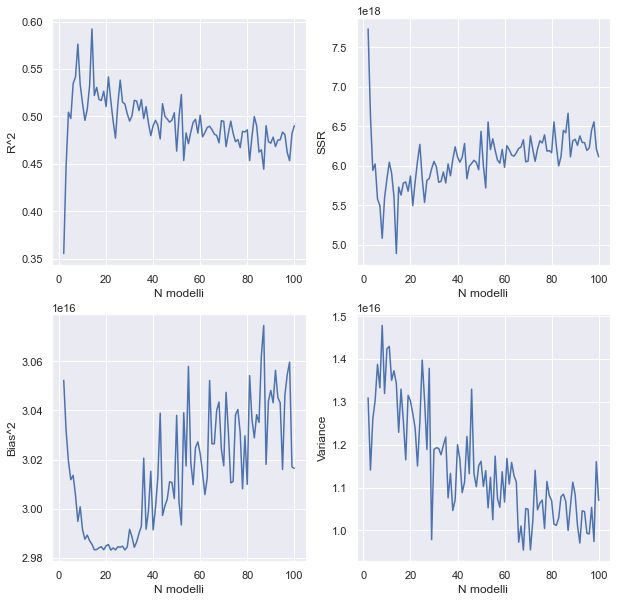

In [68]:

num_var=['budget','popularity','runtime','lingua_inglese']

X=data.loc[:,num_var]
y=data['revenue']
x_train,x_test,y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)


df_ada_l = tuning_ada(DecisionTreeRegressor(max_leaf_nodes = 14, max_depth= 4, criterion = "mae"), 100)

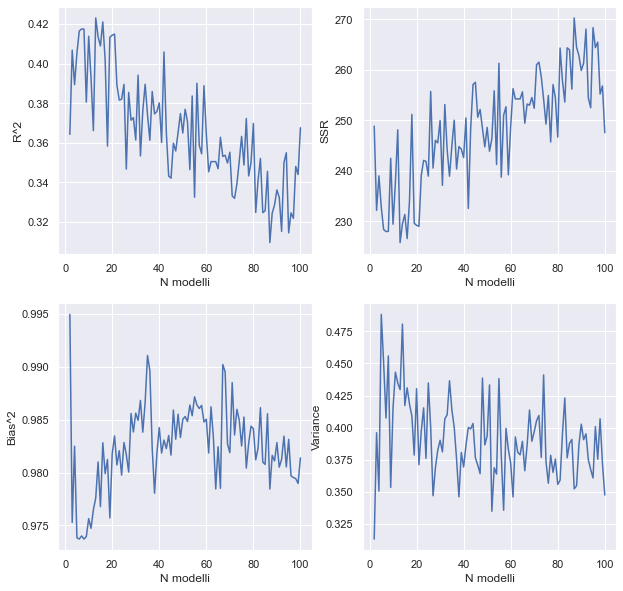

In [72]:
trasf=StandardScaler()

features = ["budgetLOG","runtime","popularityLOG", "release_month", "lingua_inglese", "revenueLOG"]
dataPred=data[features]
dataPred=pd.DataFrame(columns = dataPred.columns, data = trasf.fit_transform(dataPred))

X=dataPred.iloc[:,0:5]
y=dataPred.iloc[:,5]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
scaler.fit(x_train)

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

df_ada_l = tuning_ada(DecisionTreeRegressor(max_leaf_nodes = 14, max_depth= 4, criterion = "mae"), 100)
